Let's take a look at the patients table. It has information about every unique patient.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [4]:
patients_df = pd.read_csv('..\Extracted CSVs\PATIENTS.csv')

Getting a feel of the data.

In [5]:
patients_df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [6]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


([<matplotlib.patches.Wedge at 0x23ed447a5b0>,
 [Text(-0.21121040886107573, 1.0795323817230946, 'Male'),
  Text(0.21121040886107587, -1.0795323817230946, 'Female')])

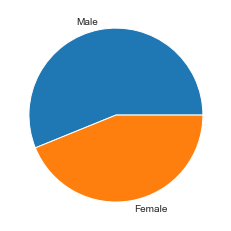

In [7]:
plt.pie(patients_df['GENDER'].value_counts(), labels = ['Male', 'Female'])

The above plot shows us the gender distribution of the patients that were admitted to the hospital.

The expire_flag column tells us if the patient is alive or dead

In [8]:
patients_df['EXPIRE_FLAG'].map(lambda x: 'DEAD' if x==1 else 'ALIVE').value_counts()

ALIVE    30761
DEAD     15759
Name: EXPIRE_FLAG, dtype: int64

([<matplotlib.patches.Wedge at 0x23ed4795250>,
 [Text(-0.5336876104506584, 0.9618614944218665, 'ALIVE'),
  Text(0.5336876104506583, -0.9618614944218666, 'DEAD')])

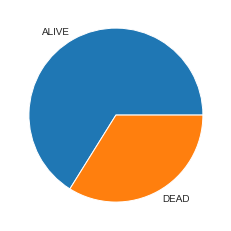

In [9]:
plt.pie(patients_df['EXPIRE_FLAG'].value_counts(), labels = ['ALIVE', 'DEAD'])

In [10]:
patients_df.groupby(['GENDER', 'EXPIRE_FLAG']).count()['ROW_ID']

GENDER  EXPIRE_FLAG
F       0              13164
        1               7235
M       0              17597
        1               8524
Name: ROW_ID, dtype: int64

The above table compares the number of deaths for female patients and male patients.

We create a DataFrame for easier analysis.

In [11]:
patients_death_df = pd.DataFrame(patients_df.groupby(['GENDER', 'EXPIRE_FLAG']).count()['ROW_ID'])
patients_death_df

ROW_ID
GENDER EXPIRE_FLAG        
F      0             13164
       1              7235
M      0             17597
       1              8524

<AxesSubplot:xlabel='GENDER,EXPIRE_FLAG'>

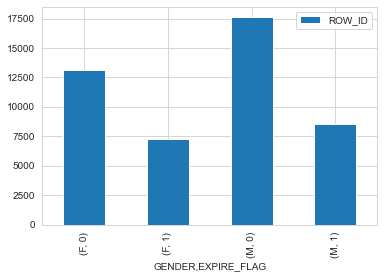

In [12]:
patients_death_df.plot(kind='bar')